# Регрессия

Набор данных - потребление газа в Италии

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data = pd.read_csv('data/Italy gas consumption.csv', index_col=0, parse_dates=True)
data.head()

,Consumption,Mean temperature
Date,,
2016-01-01,233.59,5.86
2016-01-02,250.99,6.87
2016-01-03,242.07,7.13
2016-01-04,286.05,7.28
2016-01-05,284.71,8.22


<AxesSubplot:xlabel='Date'>

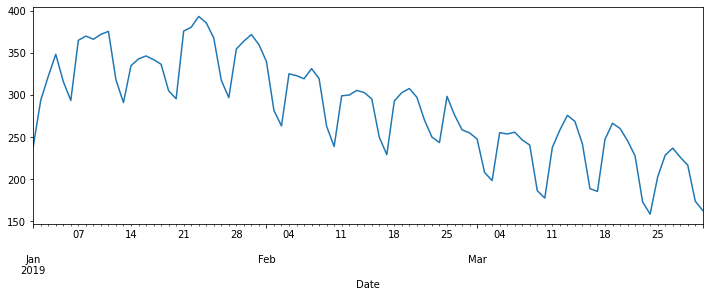

In [20]:
data['Consumption'].loc['2019-Q1'].plot(figsize=(12,4))

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
data['const'] = 1
data.head()

,Consumption,Mean temperature,const
Date,,,
2016-01-01,233.59,5.86,1
2016-01-02,250.99,6.87,1
2016-01-03,242.07,7.13,1
2016-01-04,286.05,7.28,1
2016-01-05,284.71,8.22,1


In [22]:
model = SARIMAX(data['Consumption'],
                exog=data[['Mean temperature','const']],
                order=(2, 0, 2), 
                seasonal_order=(1, 1, 1, 7)).fit()

c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

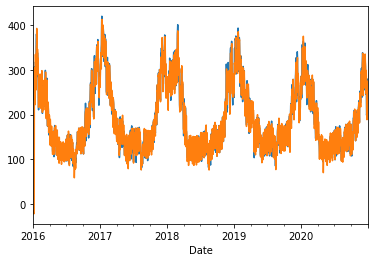

In [23]:
data['Consumption'].plot()
model.predict(start=data.index[0],
             end=data.index[-1],
             exog=data[['Mean temperature','const']]).plot()

Подберем оптимальные значения параметров SARIMAX

In [34]:
p = [0,1,2]
q = [0,1,2]
P = [0,1,2]
Q = [0,1,2]

In [35]:
from itertools import product

In [36]:
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

(2, 2, 2, 2)

In [37]:
minAIC = 10000000
opt_par = -1

for i in parameters_list:
    model = SARIMAX(data['Consumption'],
                exog=data[['Mean temperature','const']],
                order=(i[0], 1, i[1]), 
                seasonal_order=(i[2], 1, i[3], 7)).fit()
    if minAIC > model.aic:
        minAIC = model.aic
        opt_par = i
    
opt_par

c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

c:\program files\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No freque

c:\program files\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

c:\program files\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\program files\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\program files\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No freque

(2, 2, 2, 1)

In [39]:
opt_par

(2, 2, 2, 1)

In [38]:
temp = data['Mean temperature']

In [42]:
temp.groupby([temp.index.month, temp.index.day]).mean()

Date  Date
1     1       5.990
      2       6.248
      3       6.088
      4       5.708
      5       6.396
              ...  
12    27      6.568
      28      6.360
      29      5.486
      30      5.394
      31      5.382
Name: Mean temperature, Length: 366, dtype: float64